Análisis Exploratorio de Datos o EDA 

*****************
Primero importo las librerías y cargo el dataset
*****************

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
sns.set()
from scipy import stats
import matplotlib.pyplot as plt

import ColumnTransforme_regression


In [87]:
Commerce_csv=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon-pi\dataset_csv\E-Commerce_train_csv.csv')

In [73]:
Commerce_csv.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_of_the_Product_Binary,Gender_Binary,Flight,Road,Ship,A,B,C,D,F
0,4,2,177,3,F,44,1233,1,1,0,1,0,0,0,0,0,1,0
1,4,5,216,2,M,59,3088,1,0,1,1,0,0,0,0,0,0,1
2,2,2,183,4,M,48,3374,1,1,1,1,0,0,1,0,0,0,0
3,3,3,176,4,M,10,1177,1,1,1,1,0,0,0,1,0,0,0
4,2,2,184,3,F,46,2484,1,1,0,1,0,0,0,0,1,0,0


Previamente elimine la columna ID porque no aporta datos relevantes para la prediccion

In [7]:
print(Commerce_csv.shape)
Commerce_csv.describe()

(8999, 11)


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [72]:
Commerce_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Customer_care_calls         8999 non-null   int64 
 1   Customer_rating             8999 non-null   int64 
 2   Cost_of_the_Product         8999 non-null   int64 
 3   Prior_purchases             8999 non-null   int64 
 4   Gender                      8999 non-null   object
 5   Discount_offered            8999 non-null   int64 
 6   Weight_in_gms               8999 non-null   int64 
 7   Reached.on.Time_Y.N         8999 non-null   int64 
 8   Cost_of_the_Product_Binary  8999 non-null   int64 
 9   Gender_Binary               8999 non-null   int64 
 10  Flight                      8999 non-null   int64 
 11  Road                        8999 non-null   int64 
 12  Ship                        8999 non-null   int64 
 13  A                           8999 non-null   int6

In [8]:
Commerce_csv.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
valores_Commerce=Commerce_csv.columns
listvalores_Commerce=list(valores_Commerce)
listvalores_Commerce.pop(4)
#ver valores unicos en las columnas
for indice,columns_Commerce in enumerate(listvalores_Commerce) :
    print(columns_Commerce)
    sort_Commerce =Commerce_csv[columns_Commerce].sort_values()
    listaCommerce=sort_Commerce.unique()
    print(listaCommerce)

Warehouse_block
['A' 'B' 'C' 'D' 'F']
Mode_of_Shipment
['Flight' 'Road' 'Ship']
Customer_care_calls
[2 3 4 5 6 7]
Customer_rating
[1 2 3 4 5]
Prior_purchases
[ 2  3  4  5  6  7  8 10]
Product_importance
['high' 'low' 'medium']
Gender
['F' 'M']
Discount_offered
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
Weight_in_gms
[1001 1002 1003 ... 7640 7684 7846]
Reached.on.Time_Y.N
[0 1]


***********
no hay caracteres extraños
***********

In [10]:
Commerce_csv.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

*******
no hay valores duplicados
*******

In [20]:
#Commerce_csv.drop_duplicates()

*******
no hay valores faltantes o nulos
*******

separo la columna precio en un rango para Cost_of_the_Product 'bajo', 'alto'
Uso pandas cut para cortar valores de costo de producto

In [26]:
#dejo este codigo
Commerce_csv['Cost_of_the_Product_Binary'] = pd.cut(x = Commerce_csv['Cost_of_the_Product'],
            bins=[Commerce_csv['Cost_of_the_Product'].min()-1,
            Commerce_csv['Cost_of_the_Product'].mean(),
            Commerce_csv['Cost_of_the_Product'].max()+1], 
            labels=['bajo', 'alto'])

In [27]:
Costo_bajo=Commerce_csv[Commerce_csv['Cost_of_the_Product_Binary']=='bajo']
print("promedio de costo",Commerce_csv['Cost_of_the_Product'].mean())
print("limite inferior costo bajo",Costo_bajo['Cost_of_the_Product'].max())
print("limite superior costo bajo",Costo_bajo['Cost_of_the_Product'].min())

promedio de costo 208.56150683409268
limite inferior costo bajo 208
limite superior costo bajo 96


In [28]:
Costo_alto=Commerce_csv[Commerce_csv['Cost_of_the_Product_Binary']=='alto']
print("limite inferior costo alto",Costo_alto['Cost_of_the_Product'].max())
print("limite superior costo alto",Costo_alto['Cost_of_the_Product'].min())

limite inferior costo alto 310
limite superior costo alto 209


*******
separo la columna costo de producto en bajo alto segun los valores mínimo, mean y máximo se establecen como valores límite (Especificar los bordes del contenedor)
*******

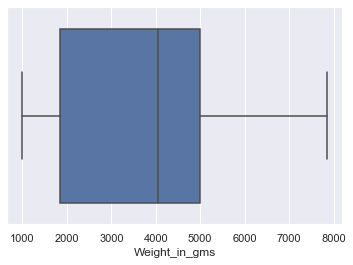

In [100]:
sns.boxplot(x = 'Weight_in_gms', data = Commerce_csv)
plt.show()

In [101]:
Q1 = Commerce_csv['Weight_in_gms'].quantile(0.25)
Q3 = Commerce_csv['Weight_in_gms'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1857.0
4999.5
3142.5
-2856.75
9713.25


In [103]:
print('Cantidad de registros totales:', Commerce_csv.shape[0])
print('Cantidad de outliers:', Commerce_csv[(Commerce_csv['Weight_in_gms']<BI) | (Commerce_csv['Weight_in_gms']>BS)].shape[0] )

Cantidad de registros totales: 8999
Cantidad de outliers: 0


*******
no hay valores atipicos
*******

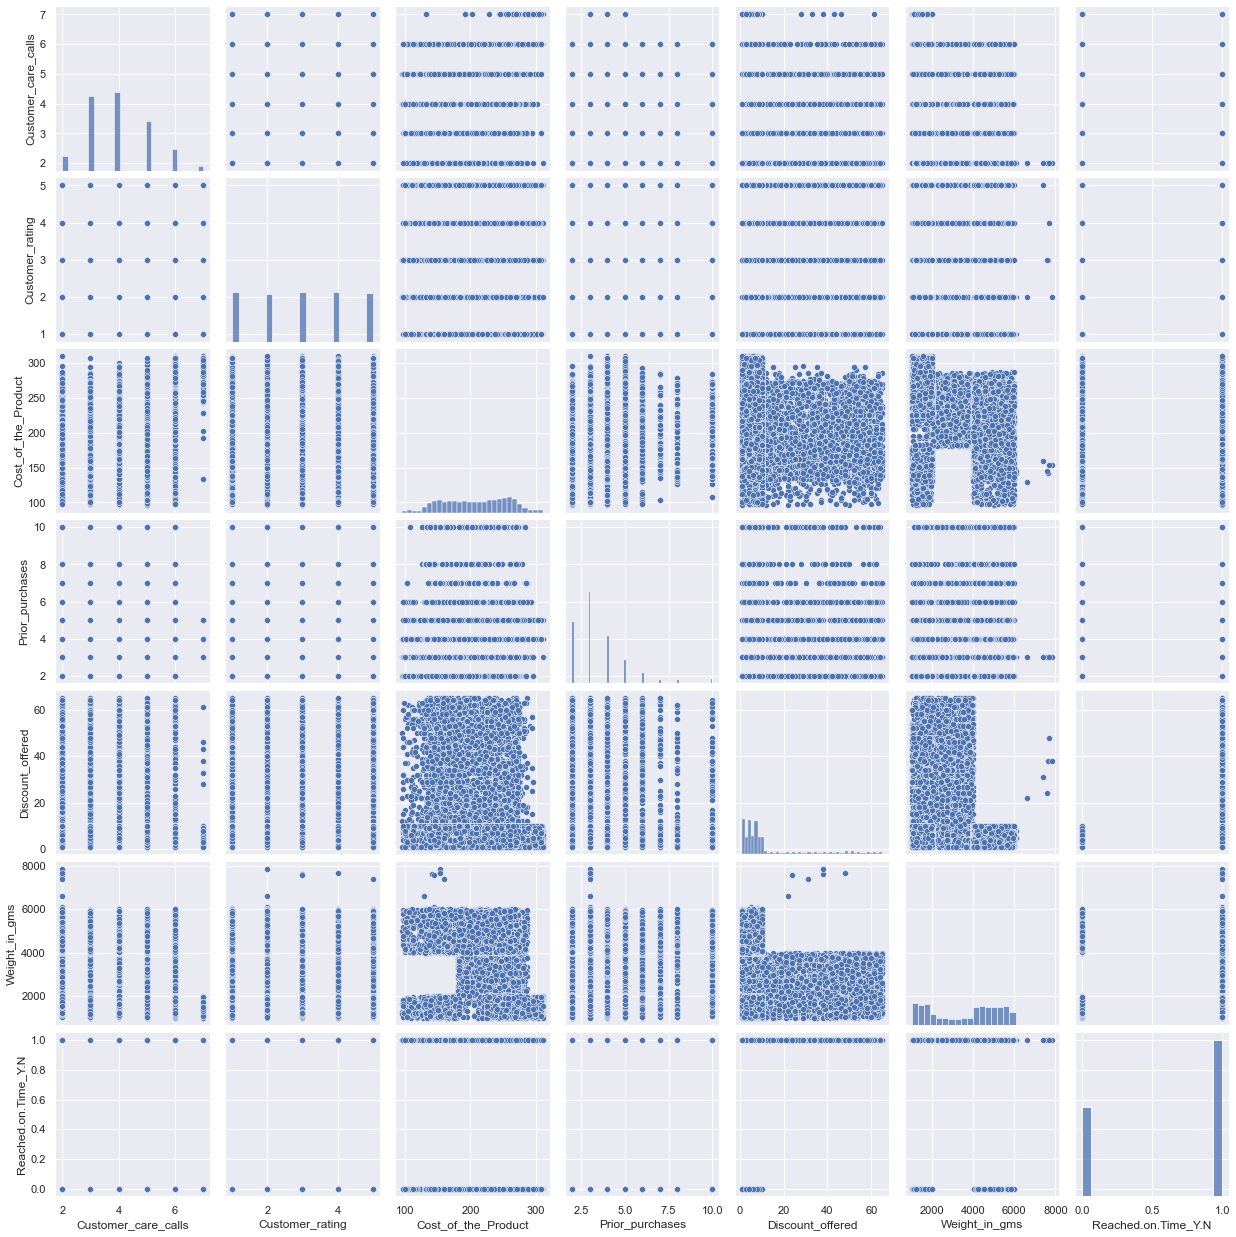

In [29]:
sns.pairplot(Commerce_csv)

In [21]:
# Veamos los valores asume Warehouse_block

Commerce_csv.Warehouse_block.value_counts()

F    2999
D    1500
A    1500
B    1500
C    1500
Name: Warehouse_block, dtype: int64

********
Distribucion de Almacén de distribución
********

<AxesSubplot:xlabel='Warehouse_block', ylabel='count'>

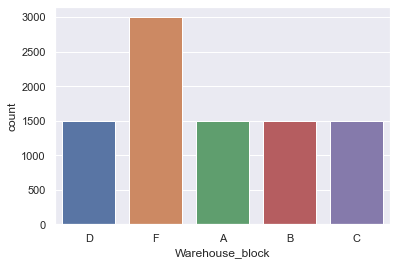

In [31]:
sns.countplot(x="Warehouse_block",data=Commerce_csv)

********
Combinaciones de dos variables
********

Las personas quieren saber cuanto va a demorar en llegar el producto por eso es importante la ubicacion del almacen y el modo de entrega.

<AxesSubplot:xlabel='Warehouse_block', ylabel='count'>

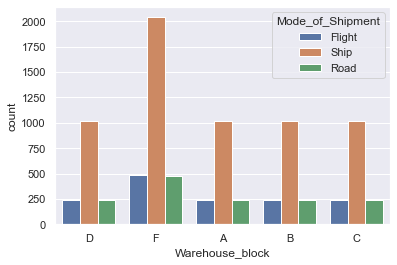

In [30]:
sns.countplot(x="Warehouse_block",hue="Mode_of_Shipment",data=Commerce_csv)

Muchas veces a la hora de hacer un pedido o una compra las personas tienden a considerar la distancia para analizar si van a realizar la compra o no.Se podria decir que la entrega mas utilizada es "ship" por la cercania entre el cliente y el almacen.

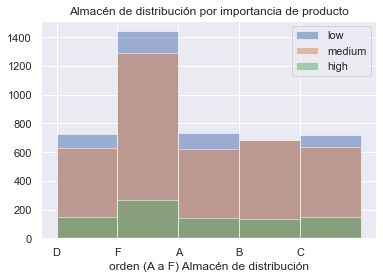

In [124]:
product_low = Commerce_csv.Warehouse_block[Commerce_csv.Product_importance=='low']
product_medium = Commerce_csv.Warehouse_block[Commerce_csv.Product_importance=='medium']
product_high = Commerce_csv.Warehouse_block[Commerce_csv.Product_importance=='high']


product_low.hist(bins = np.arange(0,6,1),label = 'low', alpha = 0.5)
product_medium.hist(bins = np.arange(0,6,1),label = 'medium', alpha = 0.5)
product_high.hist(bins = np.arange(0,6,1),label = 'high', alpha = 0.5)

plt.title('Almacén de distribución por importancia de producto')
plt.xlabel('orden (A a F) Almacén de distribución')
plt.legend()
plt.show()

********
Distribucion de envio de paquetes por sexo
********

Muchas veces se dice que las mujeres compran mas que los hombres. Veo este caso:

<AxesSubplot:xlabel='Gender', ylabel='count'>

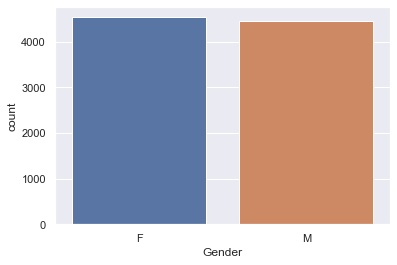

In [34]:
sns.countplot(x="Gender",data=Commerce_csv)

<AxesSubplot:xlabel='Gender', ylabel='count'>

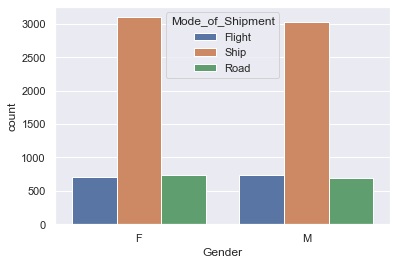

In [35]:
sns.countplot(x="Gender",hue="Mode_of_Shipment",data=Commerce_csv)

Tanto las mujeres como los hombres a la hora de realizar una compra eligen el mismo tipo de envio y ademas compran en la misma proporcion.

********
Distribucion de Número de llamadas
********

La cantidad de llamadas mas usual es un numero de 4 llamadas por cliente

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

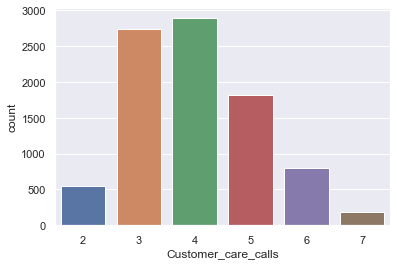

In [29]:
sns.countplot(x=Commerce_csv["Customer_care_calls"])

Se dice que las mujeres son mas comunicativas que los hombres. Veo si en este caso las mujeres tienen mas interes en llamar a atencion al cliente:

<AxesSubplot:xlabel='Gender', ylabel='count'>

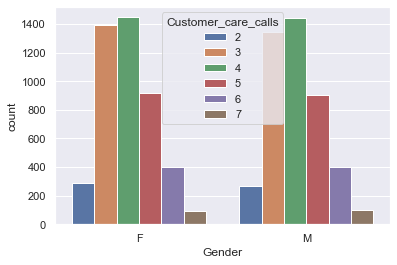

In [36]:
sns.countplot(x="Gender",hue="Customer_care_calls",data=Commerce_csv)

Se podria decir que las mujeres se interesan mas en llamar a atencion al cliente en el numero de 3 llamadas

Ahora pienso en que si el cliente pide que el producto tenga prioridad alta.¿ Sera que segun el nivel de importancia el producto es transportado y entregado mas rapido?.  Quiero saber cuantos clientes se interesan en llamar segun la importancia de su producto.

<AxesSubplot:xlabel='Customer_care_calls', ylabel='count'>

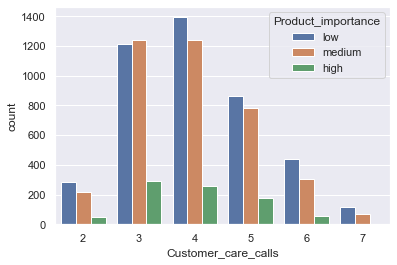

In [39]:
sns.countplot(x="Customer_care_calls",hue="Product_importance",data=Commerce_csv)

Si bien la cantidad de numeros de llamadas se mantiene y la mas usual es un numero de 4 llamadas por cliente. Tambien vemos que segun la importancia de producto las llamadas a atencion al cliente son menores.Podria afirmar que "si aumenta la importancia disminuyen las llamadas". En el caso de high para 4 llamadas hay menos de 400 llamadas y en el caso de low para 4 llamadas hay 1400.

grafico segun Mode_of_Shipment
['Flight' 'Road' 'Ship']

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

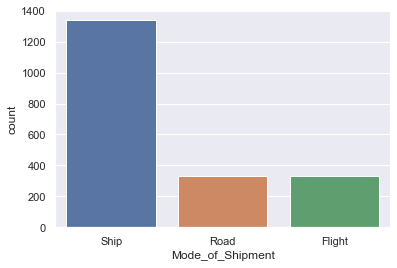

In [41]:
sns.countplot(x=Commerce_csv["Mode_of_Shipment"])

El tipo de envio mas elegido es ship. road o flight estan en la misma proporcion

Ahora podria pensar en que la puntuacion del cliente tiene que ver con su satisfaccion y con que la pregunta ¿recibio a tiempo el paquete?.

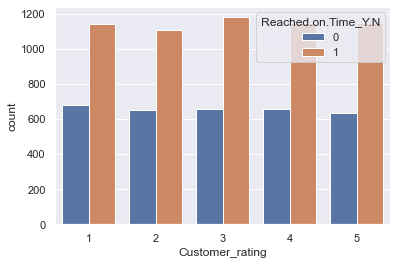

In [44]:
sns.countplot(x="Customer_rating",hue="Reached.on.Time_Y.N",data=Commerce_csv)
plt.show()

Observo que la puntuacion para los paquetes que no llegaron a tiempo es bastante pareja. Observo con mas atencion la puntuacion para paquetes que no llegaron a tiempo es mayor en 1 y la puntuacion para paquetes que si llegaron tiempo es mayor en 3. Podria decir que "mejor tiempo de entrega no implica mejor puntuacion"

Ahora pienso en que si el producto llega a tiempo el cliente va a realizar menos llamadas. Veo:

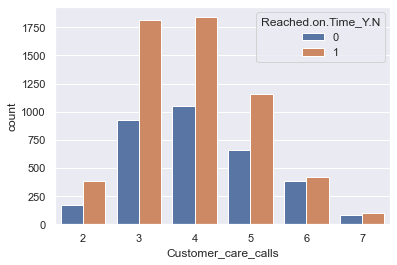

In [47]:

sns.countplot(x="Customer_care_calls",hue="Reached.on.Time_Y.N",data=Commerce_csv)
plt.show()

Al parecer la cantidad de llamadas no disminuye si el paquete se entrega a tiempo. En este caso la mayor cantidad de llamadas es entre 3 y 4 para los paquetes que si llegaron a tiempo. Podria suponer tambien viendo el grafico anterior de llamadas y importancia de producto que la mayor cantidad de llamadas surgue de los productos con low, y medium Nivel de importancia.

veo costo de producto segun el criterio de separacion bajo, alto

********
Distribucion de Cost_of_the_Product_Binary
********

<AxesSubplot:xlabel='Cost_of_the_Product_Binary', ylabel='count'>

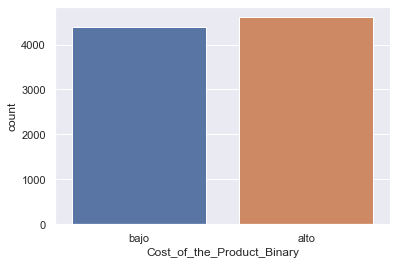

In [7]:
sns.countplot(x=Commerce_csv['Cost_of_the_Product_Binary'])

¿Podria ser que el costo del producto cambie la importancia del producto?

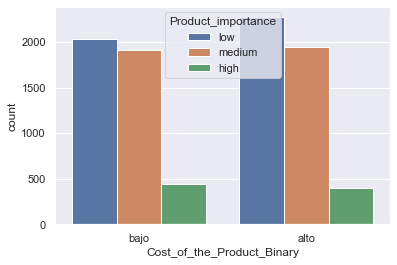

In [17]:
sns.countplot(x="Cost_of_the_Product_Binary",hue="Product_importance",data=Commerce_csv)
plt.show()

para los precios bajos hay un leve incremento en importancia high
para los precios altos hay un leve incremento en importancia low

La explicacion para el cambio en la importancia deberia ser en la preferencia del cliente en cuanto a 

se podria creer que si el precio del producto es mayor el tiempo de entrega seria mejor. veamos

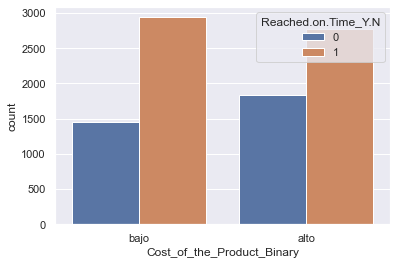

In [18]:
sns.countplot(x="Cost_of_the_Product_Binary",hue="Reached.on.Time_Y.N",data=Commerce_csv)
plt.show()

en esta segmentacion de precio podria llegar a la conclucion que los precios bajos tienen mejores entregas que los precios mas altos.

********
Veo distribucion de Product_importance
********

<AxesSubplot:xlabel='Product_importance', ylabel='count'>

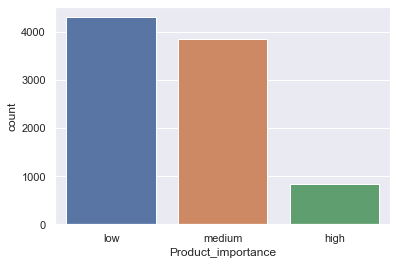

In [66]:
sns.countplot(x=Commerce_csv["Product_importance"])

Tambien podriamos creer que segun el nivel de importancia del producto podria llegar a tiempo o no. Veamos:

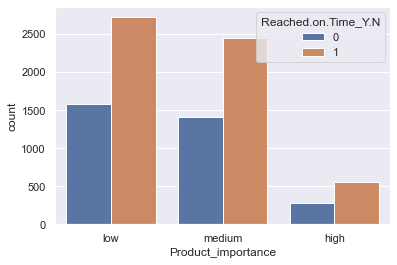

In [46]:

sns.countplot(x="Product_importance",hue="Reached.on.Time_Y.N",data=Commerce_csv)
plt.show()

In [63]:
Commerce_csv.groupby(by = ["Product_importance", "Reached.on.Time_Y.N"])["Reached.on.Time_Y.N"].count()

Product_importance  Reached.on.Time_Y.N
high                0                       279
                    1                       554
low                 0                      1586
                    1                      2722
medium              0                      1415
                    1                      2443
Name: Reached.on.Time_Y.N, dtype: int64

Podemos afirmar que segun el nivel de importancia el paquete varia el tiempo de entrega. Hay una diferencia de cantidad de paquetes que no llegaron a tiempo. Veo que para nivel de importancia high esta diferencia es menor que para low o medium. 

<AxesSubplot:xlabel='Reached.on.Time_Y.N', ylabel='count'>

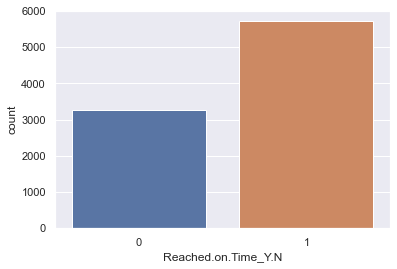

In [67]:
sns.countplot(x=Commerce_csv["Reached.on.Time_Y.N"])

Creo una mascara para Reached.on.Time_Y.N
Reached.on.Time_Y.N = Commerce_csv.Reached.on.Time_Y.N.values

In [20]:
Reached_bool= Commerce_csv['Reached.on.Time_Y.N'].values.astype(bool)

In [21]:
Reached_bool

array([ True,  True,  True, ..., False,  True, False])

Y separo la variable Customer_care_calls en dos grupos, las llamadas de los clientes que recibieron el paquete a tiempo y los que no. Luego, hago un histograma para cada uno y lo superpongo.

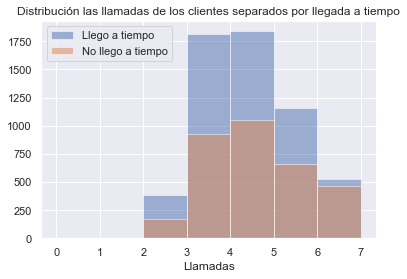

In [22]:
llamadas_llegaron = Commerce_csv.Customer_care_calls[Reached_bool]
llamadas_no_llegaron = Commerce_csv.Customer_care_calls[~Reached_bool]

llamadas_llegaron .hist(bins = np.arange(0,8,1),label = 'Llego a tiempo', alpha = 0.5)
llamadas_no_llegaron.hist(bins = np.arange(0,8,1),label = 'No llego a tiempo', alpha = 0.5)


plt.title('Distribución las llamadas de los clientes separados por llegada a tiempo')
plt.xlabel('Llamadas')
plt.legend()
plt.show()

Separo la distribucíon de los clientes que llamaron a atencion al cliente por importancia del producto
low, medium, high

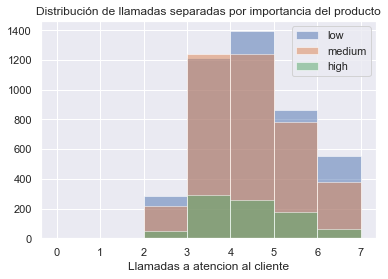

In [85]:
product_low = Commerce_csv.Customer_care_calls[Commerce_csv.Product_importance=='low']
product_medium = Commerce_csv.Customer_care_calls[Commerce_csv.Product_importance=='medium']
product_high = Commerce_csv.Customer_care_calls[Commerce_csv.Product_importance=='high']


product_low.hist(bins = np.arange(0,8,1),label = 'low', alpha = 0.5)
product_medium.hist(bins = np.arange(0,8,1),label = 'medium', alpha = 0.5)
product_high.hist(bins = np.arange(0,8,1),label = 'high', alpha = 0.5)

plt.title('Distribución de llamadas separadas por importancia del producto')
plt.xlabel('Llamadas a atencion al cliente')
plt.legend()
plt.show()

high la cantidad de 3 llamadas es mayor
medium la cantidad de 3 y 4 llamadas es igual
low la cantidad de  4 llamadas es mayor

podemos afirmar que "mientras mas baja es la importancia mayor es la cantidad de llamadas y viceversa".
************
Conclucion
************
 La preocupacion de los clientes a que su paquete no llegue a tiempo es mayor en los clientes que tienen productos con baja 
importancia por lo tanto suelen llamar mas a atencion al cliente.

Customer_care_calls en porcentaje

In [86]:
weights=np.ones_like(Commerce_csv.Customer_care_calls.values[~np.isnan(Commerce_csv.Customer_care_calls.values)])/len(Commerce_csv.Customer_care_calls.values[~np.isnan(Commerce_csv.Customer_care_calls.values)])
print(weights.sum())

0.9999999999999997


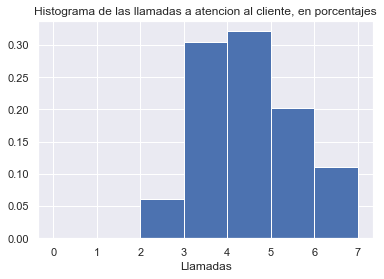

In [90]:
Commerce_csv.Customer_care_calls.hist(bins = np.arange(0,8,1), weights=weights)
plt.title('Histograma de las llamadas a atencion al cliente, en porcentajes')
plt.xlabel('Llamadas')
plt.show()

variables numericas

In [88]:
Commerce_csv.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          3918
Reached.on.Time_Y.N       2
dtype: int64

Para que el modelo de Machine Learning entienda los datos hay que llevarlos a valores que entienda. Las siguientes columnas de categorias:

*****************
no asignan orden o jerarquia
variables nominales 'Gender', 'Warehouse_block','Mode_of_Shipment'
*****************

Procesando 'Gender', 'Cost_of_the_Product_Binary'

In [105]:
print(Commerce_csv.Gender.unique(),"\n")
print(Commerce_csv.Gender.value_counts())

['F' 'M'] 

F    4540
M    4459
Name: Gender, dtype: int64


In [88]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

Commerce_csv['Gender_Binary'] = label_encoder.fit_transform(Commerce_csv['Gender'])


tanto las variables dummies como label encoder asignan un 1 para un dato presente y un 0 para ausente

Procesando 'Warehouse_block','Mode_of_Shipment'

In [12]:
pd.get_dummies(Commerce_csv['Warehouse_block'])

,A,B,C,D,F
0,0,0,0,1,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
8994,0,0,0,1,0
8995,0,0,0,0,1
8996,1,0,0,0,0
8997,0,1,0,0,0


In [13]:
pd.get_dummies(Commerce_csv['Mode_of_Shipment'])

,Flight,Road,Ship
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
8994,0,0,1
8995,0,0,1
8996,0,0,1
8997,0,0,1


In [89]:
Commerce_csv = pd.concat([Commerce_csv, pd.get_dummies(Commerce_csv['Mode_of_Shipment'])], axis=1)

In [90]:
Commerce_csv = pd.concat([Commerce_csv, pd.get_dummies(Commerce_csv['Warehouse_block'])], axis=1)

Borro las columnas que ya transforme. La columna gender_Binary la borro reemplace los valores 'F' 'M' por 0 1
Borro las columnas que ya transforme. La columna Cost_of_the_Product_Binary  la borro reemplace los valores 'F' 'M' por 0 1


In [91]:
Commerce_csv=Commerce_csv.drop(columns='Gender')

In [92]:
Commerce_csv=Commerce_csv.drop(columns='Warehouse_block')
Commerce_csv=Commerce_csv.drop(columns='Mode_of_Shipment')

In [93]:
Commerce_csv.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_Binary,Flight,Road,Ship,A,B,C,D,F
0,4,2,177,3,low,44,1233,1,0,1,0,0,0,0,0,1,0
1,4,5,216,2,low,59,3088,1,1,1,0,0,0,0,0,0,1
2,2,2,183,4,low,48,3374,1,1,1,0,0,1,0,0,0,0
3,3,3,176,4,medium,10,1177,1,1,1,0,0,0,1,0,0,0
4,2,2,184,3,medium,46,2484,1,0,1,0,0,0,0,1,0,0


***************
variable nominal 'Product_importance' establece un orden, puede ser creciente o decreciente
***************

Customer_rating mide el nivel de satisfacción del servicio por ello es una variable cualitativa

'low'=0
'medium'=1
'high'=2
se asigna un número a cada etiqueta. Defino el diccionario para luego realizar el mapeo

In [94]:
Commerce_csv['Product_importance']=Commerce_csv['Product_importance'].replace("low", 0)
Commerce_csv['Product_importance']=Commerce_csv['Product_importance'].replace("medium", 1)
Commerce_csv['Product_importance']=Commerce_csv['Product_importance'].replace("high", 2)

In [37]:
Commerce_csv=Commerce_csv.drop(columns='Product_importance')

La correlacion es una medida de asociacion entre variables. Esta asociacion no implica causalidad

<AxesSubplot:>

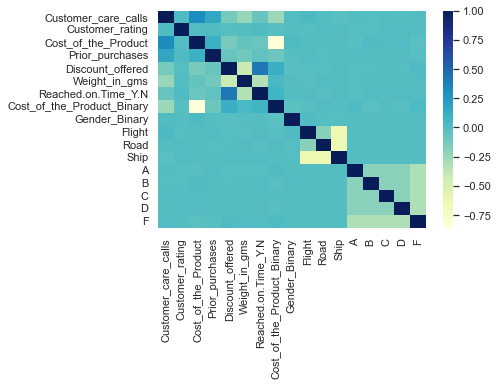

In [81]:
corr = Commerce_csv.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

Puedo observar que hay una alta correlacion entre:
****************************************************
 *Descuento ofrecido y Tiempo de entrega. Como la correlacion es positiva podria pensar en que segun como sea el descuento cambia el tiempo de entrega. Si aumenta una la otra tambien
****************************************************
 *Costo de producto y Llamadas a atencion al cliente. Como la correlacion es positiva podria pensar en que segun es el precio del paquete sera la cantidad de llamadas a atencion al cliente. Si aumenta una la otra tambien
****************************************************
 *Peso del paquete de la orden y Descuento ofrecido: Como la correlacion es negativa podria pensar en que segun es el Peso del paquete de la orden tambien cambia el Descuento ofrecido. Si aumenta o disminuye la otra hace lo contrario
****************************************************
 *Tiempo de entrega y Peso del paquete de la orden: Como la correlacion es negativa podria pensar en que si el Tiempo de entrega
aumenta o disminuye el Peso del paquete de la ordenla hace lo contrario

***********
varianza
***********

Buscar que variables aporten informacion para predecir depende de que tan diferentes sean los valores que contiene cada columna

In [82]:
cant_col=Commerce_csv.shape[1]

In [83]:
cant_col

17

In [84]:
nombre_col=Commerce_csv.columns

In [108]:
for i in range(cant_col):
    varianza=Commerce_csv.iloc[:,i].var()
    print(Commerce_csv.columns.values[i],"varianza: ",varianza)



Customer_care_calls varianza:  1.0001111358079566
Customer_rating varianza:  1.9969743248496579
Cost_of_the_Product varianza:  1.000111135807957
Prior_purchases varianza:  1.0001111358079573
Product_importance varianza:  0.42221769176842433
Discount_offered varianza:  1.000111135807957
Weight_in_gms varianza:  1.0001111358079569
Reached.on.Time_Y.N varianza:  0.23166141228158987
Gender_Binary varianza:  0.250007527200239
Flight varianza:  0.1349554015547059
Road varianza:  0.1336701089580451
Ship varianza:  0.21751687062312447
A varianza:  0.13891667249782835
B varianza:  0.13891667249782835
C varianza:  0.13891667249782835
D varianza:  0.13891667249782835
F varianza:  0.22222221673342435


borro las columnas de menor varianza

In [109]:
col=["A","B","C","D","F","Road","Ship","Flight","Gender_Binary"]
Commerce_csv=Commerce_csv.drop(columns=col)

no hay ninguna varianza igual a 0 

*********
Escalado
*********

Customer_care_calls,	Customer_rating,	Cost_of_the_Product,	Prior_purchases, Discount_offered,	Weight_in_gms

Tanto la variacion de los datos como la escala en la que se miden pueden infulir en el resultado. Para ello podemos usar la
Normalización (estandarización): consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala.
****Para evitar que los modelos de aprendizaje supervisado se desvíen hacia un rango específico de valores.

Normalización Z-score (StandardScaler): dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

                   z=x−μσ
 
Estandarización max-min (MinMaxScaler): transformar los datos de forma que estén dentro del rango [0, 1].

                   Xnorm=X−XminXmax−Xmin
 
Nunca se deben estandarizar las variables después de ser binarizadas 

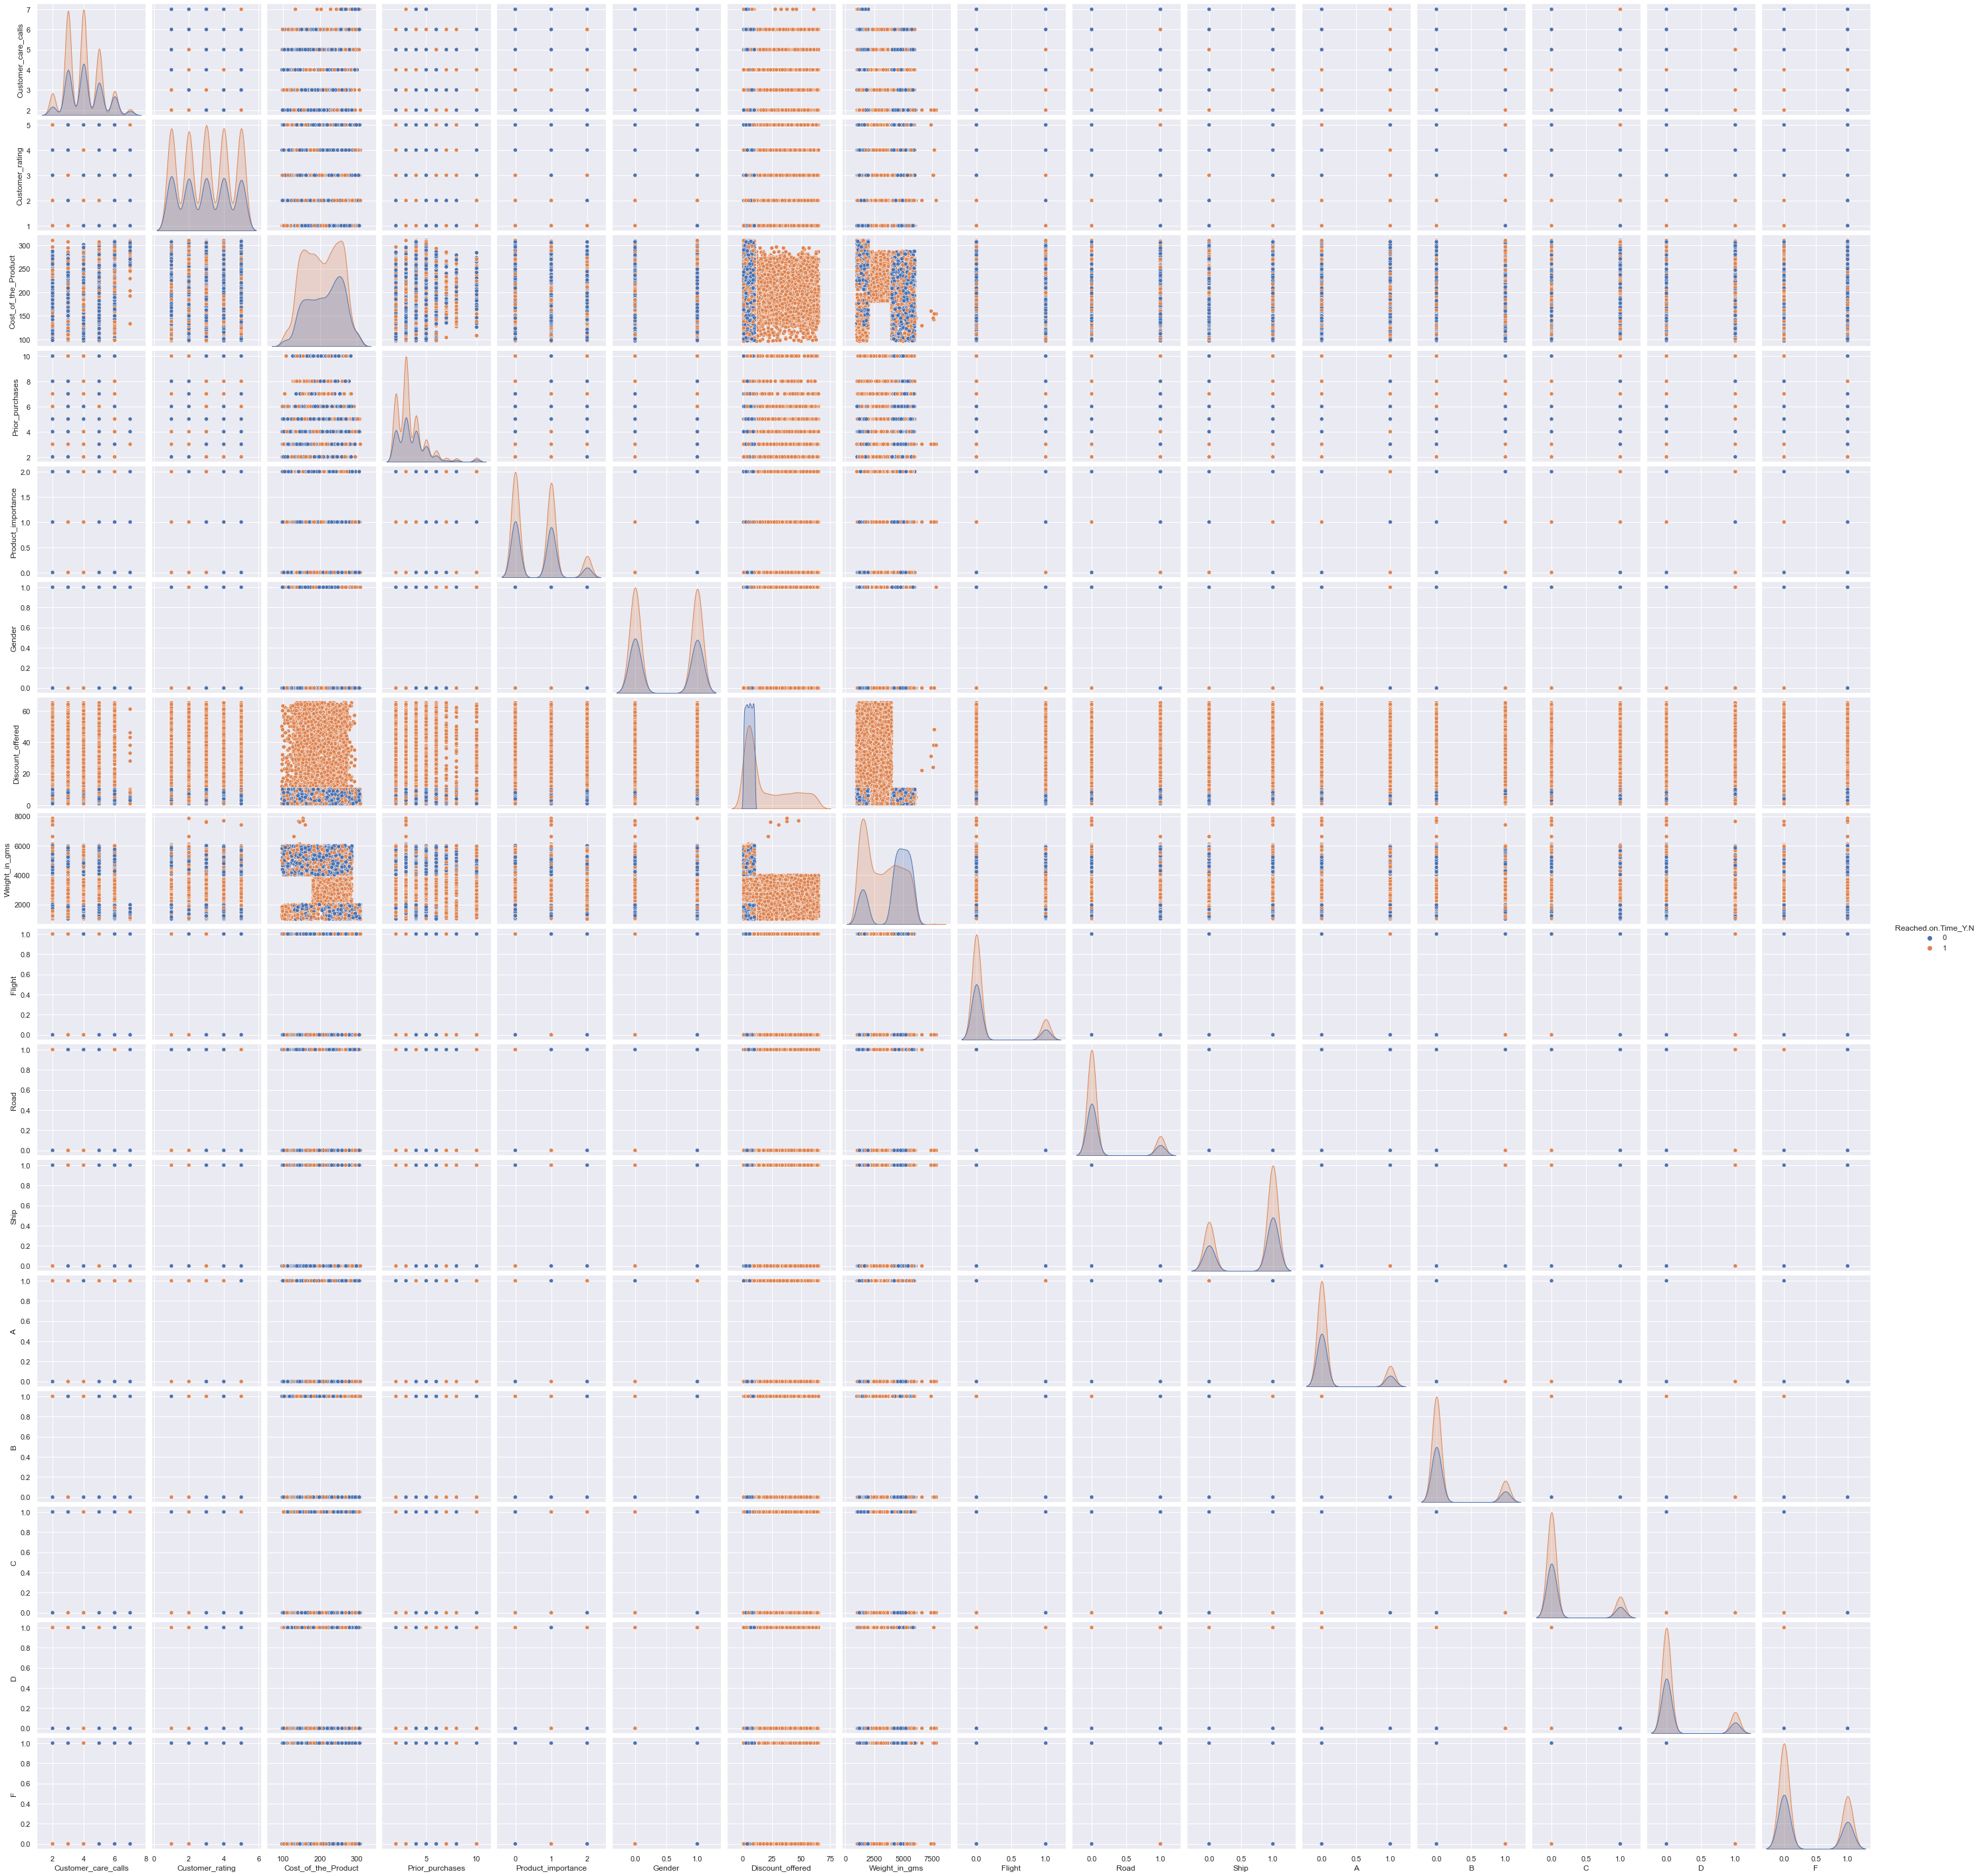

In [22]:
sns.pairplot(data = Commerce_csv, hue="Reached.on.Time_Y.N")
#obtener diferencia entre los datos de envios que llegaron a tiempo y no

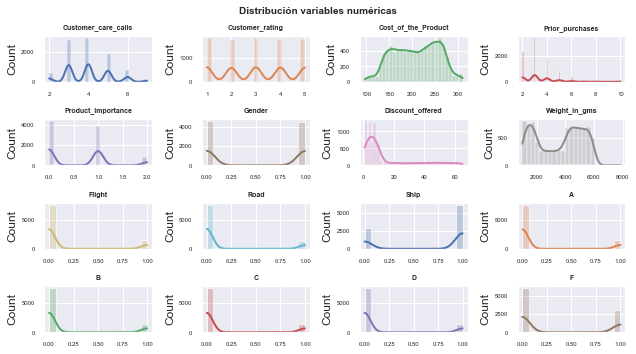

In [16]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_numeric = Commerce_csv.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Reached.on.Time_Y.N')

for i, colum in enumerate(columnas_numeric):
    
    sns.histplot(
        data    = Commerce_csv,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


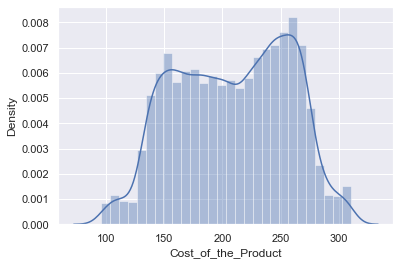

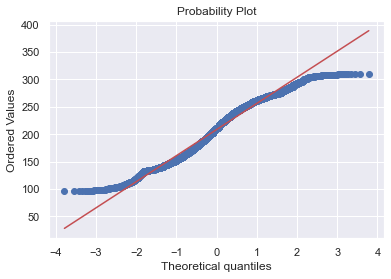

In [20]:
sns.distplot(Commerce_csv['Cost_of_the_Product'])
fig = plt.figure()
res = stats.probplot(Commerce_csv['Cost_of_the_Product'], plot = plt)

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


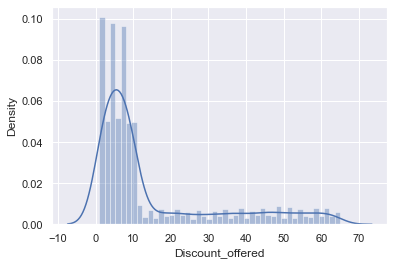

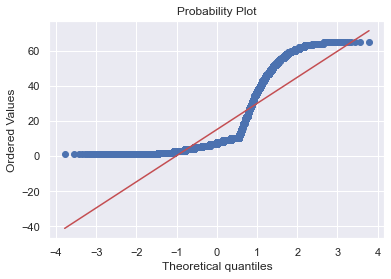

In [23]:
sns.distplot(Commerce_csv['Discount_offered'])
fig = plt.figure()
res = stats.probplot(Commerce_csv['Discount_offered'], plot = plt)

Customer_care_calls=Almacén de distribución de donde salió la orden (A a F).

In [95]:
print(Commerce_csv.columns)

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Discount_offered',
       'Weight_in_gms', 'Reached.on.Time_Y.N', 'Gender_Binary', 'Flight',
       'Road', 'Ship', 'A', 'B', 'C', 'D', 'F'],
      dtype='object')


In [96]:
Commerce_csv.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_Binary,Flight,Road,Ship,A,B,C,D,F
0,4,2,177,3,0,44,1233,1,0,1,0,0,0,0,0,1,0
1,4,5,216,2,0,59,3088,1,1,1,0,0,0,0,0,0,1
2,2,2,183,4,0,48,3374,1,1,1,0,0,1,0,0,0,0
3,3,3,176,4,1,10,1177,1,1,1,0,0,0,1,0,0,0
4,2,2,184,3,1,46,2484,1,0,1,0,0,0,0,1,0,0


In [97]:
from sklearn.preprocessing import StandardScaler
Standar =Commerce_csv[["Customer_care_calls","Cost_of_the_Product","Prior_purchases" ,"Discount_offered","Weight_in_gms"]]
Standar_scaled_features = StandardScaler().fit_transform(Standar.values)

In [99]:
print("mean",Standar_scaled_features.mean(axis=0))
print("std",Standar_scaled_features.std(axis=0))


mean [-9.15912405e-17 -1.29491064e-16 -1.01066196e-16  5.05330982e-17
 -9.47495592e-17]
std [1. 1. 1. 1. 1.]


In [100]:
col=["Customer_care_calls","Cost_of_the_Product","Prior_purchases" ,"Discount_offered","Weight_in_gms"]
df=pd.DataFrame(Standar_scaled_features)
#data_ML_car.loc[data_ML_car['carwidth']]=df[
df.columns=col

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Density'>

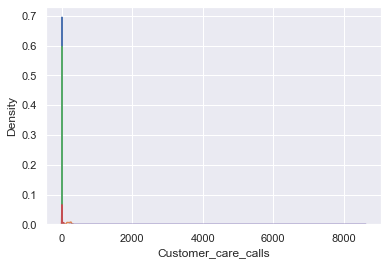

In [103]:
sns.kdeplot(Commerce_csv["Customer_care_calls"])
sns.kdeplot(Commerce_csv["Cost_of_the_Product"])
sns.kdeplot(Commerce_csv["Prior_purchases"])
sns.kdeplot(Commerce_csv["Discount_offered"])
sns.kdeplot(Commerce_csv["Weight_in_gms"])

<AxesSubplot:xlabel='Customer_care_calls', ylabel='Density'>

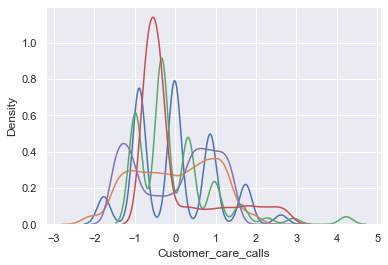

In [102]:
sns.kdeplot(df["Customer_care_calls"])
sns.kdeplot(df["Cost_of_the_Product"])
sns.kdeplot(df["Prior_purchases"])
sns.kdeplot(df["Discount_offered"])
sns.kdeplot(df["Weight_in_gms"])

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,8999.0,-9.159124e-17,1.000056,-1.769395,-0.891333,-0.013270,0.864793,2.620918
Cost_of_the_Product,8999.0,-1.294911e-16,1.000056,-2.331118,-0.840018,0.050501,0.847825,2.100763
Prior_purchases,8999.0,-1.010662e-16,1.000056,-0.986627,-0.333881,-0.333881,0.318866,4.235343
Discount_offered,8999.0,5.053310e-17,1.000056,-0.810254,-0.637832,-0.407934,0.224283,2.868102
Weight_in_gms,8999.0,-9.474956e-17,1.000056,-1.599943,-1.069801,0.285902,0.876429,2.639338


In [104]:
Commerce_csv[col]=df[col]

In [110]:
Commerce_csv.to_csv("E-Commerce_train_procesado1.csv", index=False)

In [3]:
Commerce_csv_test=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon-pi\dataset_csv\E-Commerce_test_csv.csv')

In [4]:
Commerce_csv_train=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon-pi\dataset_csv\E-Commerce_train_csv.csv')

In [5]:
Commerce_csv_train_proc=ColumnTransforme_regression.funcion_ColumnTransforme(Commerce_csv_train)

In [13]:
Commerce_csv_train_proc.shape

(8999, 7)

In [9]:
Commerce_csv_train_proc.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,-0.013270,2,-0.653630,-0.333881,1.661141,-1.456259,1
1,-0.013270,5,0.154049,-0.986627,2.523256,-0.307411,1
2,-1.769395,2,-0.529372,0.318866,1.891039,-0.130284,1
3,-0.891333,3,-0.674340,0.318866,-0.292986,-1.490942,1
4,-1.769395,2,-0.508662,-0.333881,1.776090,-0.681484,1


In [6]:
#utilizo mi funcion para procesar los datos
Commerce_csv_test_proc=ColumnTransforme_regression.funcion_ColumnTransforme(Commerce_csv_test)

In [6]:
Commerce_csv_test_proc.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0.676389,1,-0.616410,-1.251576,1.510350,0.814459
1,0.676389,3,-1.458294,-1.251576,1.165993,0.344728
2,-1.083894,3,-0.378956,-0.563897,-0.900149,1.102038
3,0.676389,1,-1.825269,-1.251576,-1.588863,0.460111
4,-0.203753,2,0.916250,-0.563897,-0.555792,0.964399


In [15]:
#tomo los valores de las columnas
X = Commerce_csv_train_proc.iloc[:, [0,1,2,3,4,5]].values
y =Commerce_csv_train_proc.iloc[:, 6].values

In [17]:
#divido los datos en test y entrenamiento
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [18]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 10) 
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [19]:
from sklearn.metrics import precision_score
y_pred = classifier.predict(X_test) 
test_acc = precision_score(y_test, y_pred) 
print('La precisión del conjunto de pruebas es {}'.format(test_acc*100))

La precisión del conjunto de pruebas es 73.44827586206897


Text(0.5, 30.5, 'Valores previstos')

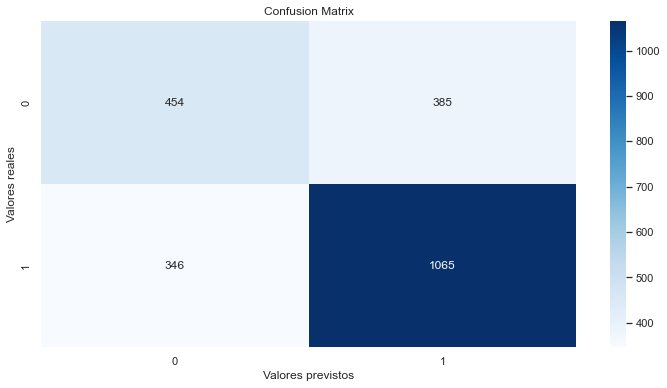

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred) 
plt.figure(figsize=(12,6)) 
plt.title("Confusion Matrix") 
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues' ) 
plt.ylabel("Valores reales") 
plt.xlabel("Valores previstos")

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.54      0.55       839
           1       0.73      0.75      0.74      1411

    accuracy                           0.68      2250
   macro avg       0.65      0.65      0.65      2250
weighted avg       0.67      0.68      0.67      2250



In [40]:
X = Commerce_csv_test_proc.iloc[:, [0,1,2,3,4,5]].values

In [41]:
res=classifier.predict(X)

In [6]:
col=["pred"]
df3=pd.DataFrame(res)
#data_ML_car.loc[data_ML_car['carwidth']]=df[
df3.columns=col

NameError: name 'res' is not defined

In [49]:
df3

,pred
0,1
1,1
2,0
3,0
4,0
...,...
1995,0
1996,1
1997,1
1998,0


In [7]:
df3=ColumnTransforme_regression.funcion_regression_log(Commerce_csv_train_proc,Commerce_csv_test_proc)

In [8]:
df3

,pred
0,1
1,1
2,0
3,0
4,0
...,...
1995,0
1996,1
1997,1
1998,0


In [9]:
df3.to_csv("bparedes21.csv", index=False)

In [10]:
bparedes21=pd.read_csv(r'C:\Users\ROXI\OneDrive\Escritorio\datathon\Datathon-pi\bparedes21.csv')

In [11]:
bparedes21

,pred
0,1
1,1
2,0
3,0
4,0
...,...
1995,0
1996,1
1997,1
1998,0
